<a href="https://colab.research.google.com/github/dcastf01/Challenge_Ocean_2022/blob/main/audio_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/dcastf01/Challenge_Ocean_2022.git

Cloning into 'Challenge_Ocean_2022'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [4]:
!pip install ffmpeg-python==0.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
cd Challenge_Ocean_2022/src

/content/Challenge_Ocean_2022/src


##Extract log spec with code from Whisper

In [2]:
path_audio='/content/84-121123-0000.flac'

In [6]:
from audio import load_audio,SAMPLE_RATE,N_FFT,HOP_LENGTH,mel_filters,N_MELS,log_mel_spectrogram
import matplotlib.pyplot as plt


In [6]:
log_spec=log_mel_spectrogram(path_audio)

In [7]:
plt.imshow(log_spec)


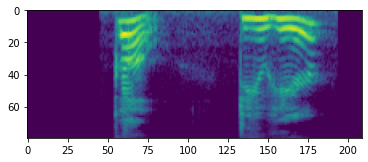

##creating my own aumentation and analysis

In [5]:
import torch
import torchaudio

In [7]:
a,b=torchaudio.load(path_audio)

In [8]:
a

tensor([[0., 0., 0.,  ..., 0., 0., 0.]])

In [9]:
if not torch.is_tensor(aud):
    if isinstance(aud, str):
        aud = load_audio(aud)
    aud = torch.from_numpy(aud)

window = torch.hann_window(N_FFT).to(aud.device)
stft = torch.stft(aud, N_FFT, HOP_LENGTH, window=window, return_complex=True)
magnitudes = stft[:, :-1].abs() ** 2

filters = mel_filters(aud.device, N_MELS)
mel_spec = filters @ magnitudes

log_spec = torch.clamp(mel_spec, min=1e-10).log10()
log_spec = torch.maximum(log_spec, log_spec.max() - 8.0)
log_spec = (log_spec + 4.0) / 4.0

In [10]:
plt.imshow(log_spec)

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [15]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    # waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

In [16]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

tensor(1.4250)

tensor(-0.5750)

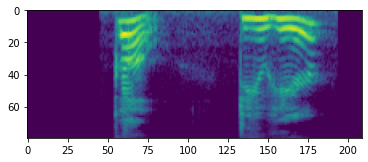